Invoke-WebRequest -Uri "https://www.scss.tcd.ie/Doug.Leith/CSU44061/week3.php" -OutFile "week3.csv"

# id:13-13--13 

https://github.com/Chenmo1212/TCD-Machine_Learning/blob/main/00_Weekly%20Assignments(ML)/02_Week_3/02_Jupyter/Untitled.ipynb

In [9]:
import numpy as np
data = np.loadtxt('week3.csv', delimiter=',')
X = data[:, :2]
y = data[:, 2]

Question (i)a

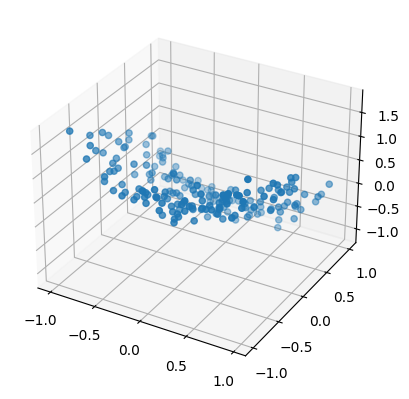

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y)

Question i(b)

In [16]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures

def lasso_regression_model(x, y, model_name, degree_poly, test_c_vals):
    x_poly = PolynomialFeatures(degree_poly).fit_transform(x)
    results_dfs = []

    for c in test_c_vals:
        if model_name == 'Lasso':
            model = Lasso(alpha=1 / (2 * c))
        elif model_name == 'Ridge':
            model = Ridge(alpha=1 / (2 * c))

        model.fit(x_poly, y)

        result_dict = {
            'C_value': c,
            'coefficient': np.around(model.coef_, decimals=2),
            'intercept': model.intercept_
        }

        results_dfs.append(pd.DataFrame([result_dict]))

    model_results = pd.concat(results_dfs, ignore_index=True)
    return model_results

# Define your X and y here

C_values = [1, 10, 100, 1000, 10000]
model_name = 'Lasso'

for degree_poly in range(len(C_values)):
    result = lasso_regression_model(X, y, model_name, degree_poly, C_values)
    with pd.option_context('display.max_colwidth', 400):
        print(f'Parameters for degree of polynomial feature = {degree_poly}')
        display(result)


Parameters for degree of polynomial feature = 0


,C,Coefficients,Intercept
0,1,[0.0],0.320287
1,10,[0.0],0.320287
2,100,[0.0],0.320287
3,1000,[0.0],0.320287
4,10000,[0.0],0.320287


Parameters for degree of polynomial feature = 1


,C,Coefficients,Intercept
0,1,"[0.0, 0.0, -0.0]",0.320287
1,10,"[0.0, 0.0, -0.824]",0.313954
2,100,"[0.0, 0.005, -0.954]",0.312879
3,1000,"[0.0, 0.018, -0.965]",0.312610
4,10000,"[0.0, 0.019, -0.967]",0.312583


Parameters for degree of polynomial feature = 2


,C,Coefficients,Intercept
0,1,"[0.0, 0.0, -0.0, 0.0, -0.0, -0.0]",0.320287
1,10,"[0.0, 0.0, -0.838, 0.37, -0.0, -0.0]",0.194530
2,100,"[0.0, 0.0, -0.988, 0.863, 0.0, -0.055]",0.053157
3,1000,"[0.0, 0.011, -1.002, 0.906, 0.0, -0.102]",0.055228
4,10000,"[0.0, 0.012, -1.004, 0.911, 0.004, -0.107]",0.055248


Parameters for degree of polynomial feature = 3


,C,Coefficients,Intercept
0,1,"[0.0, 0.0, -0.0, 0.0, -0.0, -0.0, 0.0, -0.0, 0.0, -0.0]",0.320287
1,10,"[0.0, 0.0, -0.838, 0.37, -0.0, -0.0, 0.0, -0.0, 0.0, -0.0]",0.194530
2,100,"[0.0, 0.0, -0.936, 0.863, 0.0, -0.054, 0.0, 0.0, 0.0, -0.088]",0.052418
3,1000,"[0.0, 0.01, -0.914, 0.905, 0.002, -0.1, -0.0, 0.028, -0.0, -0.162]",0.053745
4,10000,"[0.0, 0.032, -0.915, 0.911, 0.007, -0.103, -0.021, 0.042, -0.023, -0.171]",0.052967


Parameters for degree of polynomial feature = 4


,C,Coefficients,Intercept
0,1,"[0.0, 0.0, -0.0, 0.0, -0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, -0.0]",0.320287
1,10,"[0.0, 0.0, -0.838, 0.37, -0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, -0.0]",0.194530
2,100,"[0.0, 0.0, -0.936, 0.863, 0.0, -0.054, 0.0, 0.0, 0.0, -0.088, 0.0, 0.0, -0.0, 0.0, -0.0]",0.052418
3,1000,"[0.0, 0.009, -0.901, 0.806, -0.092, -0.316, -0.0, 0.017, -0.005, -0.181, 0.128, 0.184, 0.0, 0.001, 0.254]",0.083088
4,10000,"[0.0, 0.056, -0.885, 0.768, -0.27, -0.504, -0.048, 0.007, -0.069, -0.217, 0.145, 0.322, 0.118, 0.181, 0.438]",0.107717
